# Dataset 

https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset

# Problem definition 

We chose a dataset combining different types of food, world population obesity and undernourished rate, and global covid cases count from around the world.

The idea is to understand how a healthy eating style could help combat the coronavirus, distinguishing the diet patterns from countries with lower COVID infection rate.

Our goal here is to provide diet recommendations based on our findings.

Each dataset provides different diet measure different categories of food, depending on what we want to focus on, so we have

- fat quantity,
- energy intake (kcal),
- food supply quantity (kg),
- protein for different categories of food

To which have been added:

- obesity rate
- undernourished rate
- the most up to date confirmed/deaths/recovered/active cases.

We are going to focus on the fat quantity dataset.

In [21]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import export_graphviz, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC, SVR
from matplotlib import rcParams
import plotly.express as px


In [20]:
#!pip install plotly


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 35.8 MB/s eta 0:00:0000:0100:01


Let's start by loading the data

In [4]:
fat_quantity = pd.read_csv("./Fat_Supply_Quantity_Data.csv")

 ## Data Exploration and Processing

Now let's explore the dataset:
- check the head
- the columns
- the variable types

In [5]:
# Display the first few rows (head) of the DataFrame
print(fat_quantity.head())

# Display the columns of the DataFrame
print(fat_quantity.columns)

# Display the variable types of each column in the DataFrame
print(fat_quantity.dtypes)


               Country  Alcoholic Beverages  Animal Products  Animal fats  \
0          Afghanistan                  0.0          21.6397       6.2224   
1              Albania                  0.0          32.0002       3.4172   
2              Algeria                  0.0          14.4175       0.8972   
3               Angola                  0.0          15.3041       1.3130   
4  Antigua and Barbuda                  0.0          27.7033       4.6686   

   Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  \
0                      0.0                    8.0353  0.6859         0.0327   
1                      0.0                    2.6734  1.6448         0.1445   
2                      0.0                    4.2035  1.2171         0.2008   
3                      0.0                    6.5545  0.1539         1.4155   
4                      0.0                    3.2153  0.3872         1.5263   

   Fruits - Excluding Wine     Meat  ...  Vegetable Oils  Vege

Let's create a function to **check missing data** and unveil **the percentage of data missing** for each dataframe

In [6]:
def check_missing_data(df):
    """
    Check missing data in a DataFrame and calculate the percentage of missing values for each column.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - missing_data (pd.DataFrame): A DataFrame containing the count and percentage of missing values for each column.
    """
    # Count missing values for each column
    missing_count = df.isnull().sum()

    # Calculate percentage of missing values
    missing_percentage = (missing_count / len(df)) * 100

    # Create a DataFrame with missing data information
    missing_data = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    })

    # Sort the DataFrame by the percentage of missing values in descending order
    missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

    return missing_data

# Use the function on your 'fat_quantity' DataFrame
missing_data_fat_quantity = check_missing_data(fat_quantity)

# Display the result
print(missing_data_fat_quantity)



                              Missing Count  Missing Percentage
Active                                    8            4.705882
Undernourished                            7            4.117647
Recovered                                 6            3.529412
Deaths                                    6            3.529412
Confirmed                                 6            3.529412
Obesity                                   3            1.764706
Country                                   0            0.000000
Alcoholic Beverages                       0            0.000000
Population                                0            0.000000
Vegetables                                0            0.000000
Vegetable Oils                            0            0.000000
Vegetal Products                          0            0.000000
Treenuts                                  0            0.000000
Sugar & Sweeteners                        0            0.000000
Sugar Crops                             

Delete the countries for which values are missing.

In [7]:
# Drop rows with missing values and update the DataFrame in place
fat_quantity = fat_quantity.dropna()

# Display the first few rows of the updated DataFrame
print(fat_quantity.head())


       Country  Alcoholic Beverages  Animal Products  Animal fats  \
0  Afghanistan                  0.0          21.6397       6.2224   
1      Albania                  0.0          32.0002       3.4172   
2      Algeria                  0.0          14.4175       0.8972   
3       Angola                  0.0          15.3041       1.3130   
5    Argentina                  0.0          30.3572       3.3076   

   Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  \
0                      0.0                    8.0353  0.6859         0.0327   
1                      0.0                    2.6734  1.6448         0.1445   
2                      0.0                    4.2035  1.2171         0.2008   
3                      0.0                    6.5545  0.1539         1.4155   
5                      0.0                    1.3316  1.5706         0.1664   

   Fruits - Excluding Wine     Meat  ...  Vegetable Oils  Vegetables  Obesity  \
0                   0.4246   

Look at the different data types for each variable.

In [8]:
# Display the data types of each variable in the DataFrame
print(fat_quantity.dtypes)


Country                          object
Alcoholic Beverages             float64
Animal Products                 float64
Animal fats                     float64
Aquatic Products, Other         float64
Cereals - Excluding Beer        float64
Eggs                            float64
Fish, Seafood                   float64
Fruits - Excluding Wine         float64
Meat                            float64
Miscellaneous                   float64
Milk - Excluding Butter         float64
Offals                          float64
Oilcrops                        float64
Pulses                          float64
Spices                          float64
Starchy Roots                   float64
Stimulants                      float64
Sugar Crops                     float64
Sugar & Sweeteners              float64
Treenuts                        float64
Vegetal Products                float64
Vegetable Oils                  float64
Vegetables                      float64
Obesity                         float64


Explore the variables that are not of float type and see of you can convert them in to float type.

In [9]:
# Display information about the DataFrame, including data types
fat_quantity.info()


<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       154 non-null    object 
 1   Alcoholic Beverages           154 non-null    float64
 2   Animal Products               154 non-null    float64
 3   Animal fats                   154 non-null    float64
 4   Aquatic Products, Other       154 non-null    float64
 5   Cereals - Excluding Beer      154 non-null    float64
 6   Eggs                          154 non-null    float64
 7   Fish, Seafood                 154 non-null    float64
 8   Fruits - Excluding Wine       154 non-null    float64
 9   Meat                          154 non-null    float64
 10  Miscellaneous                 154 non-null    float64
 11  Milk - Excluding Butter       154 non-null    float64
 12  Offals                        154 non-null    float64
 13  Oilcrops  

In [14]:
fat_quantity.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,0.001142,20.371363,4.156129,0.000497,4.470623,0.947074,0.825396,0.536843,9.075049,0.050782,...,0.727281,29.628879,18.825103,0.306868,18.449351,1.361156,0.025905,0.915089,0.432761,4.796579e+07
std,0.010051,8.027724,3.360236,0.004242,3.248573,0.661384,0.930353,0.856490,4.456419,0.065645,...,0.845867,8.027314,6.824286,0.205127,9.519483,1.580931,0.033431,1.195862,0.884804,1.639258e+08
min,0.000000,5.018200,0.167800,0.000000,0.990800,0.058000,0.031500,0.037300,0.906100,0.000000,...,0.000000,13.098200,4.954900,0.026300,2.100000,0.000312,0.000000,0.000000,0.000000,7.200000e+04
25%,0.000000,14.531900,1.624975,0.000000,2.010925,0.363475,0.320300,0.235125,6.029075,0.009425,...,0.130150,23.293600,14.029650,0.175725,8.250000,0.096013,0.001591,0.063172,0.006266,3.403500e+06
50%,0.000000,20.099700,3.304450,0.000000,3.454750,0.867750,0.567000,0.366000,8.964900,0.028000,...,0.500950,29.902150,18.363000,0.247050,21.300000,0.682889,0.008301,0.360716,0.059554,1.058950e+07
75%,0.000000,26.707425,6.253750,0.000000,5.694575,1.251575,1.021775,0.577800,11.396200,0.067675,...,0.934250,35.471300,23.697575,0.362925,25.700000,2.235665,0.035464,1.281670,0.452488,3.383650e+07
max,0.097600,36.901800,14.937300,0.051100,18.376300,3.275600,8.406800,9.672700,26.429200,0.456100,...,4.975600,44.981800,36.418600,1.153800,45.500000,6.720740,0.156787,5.279589,5.133799,1.402385e+09


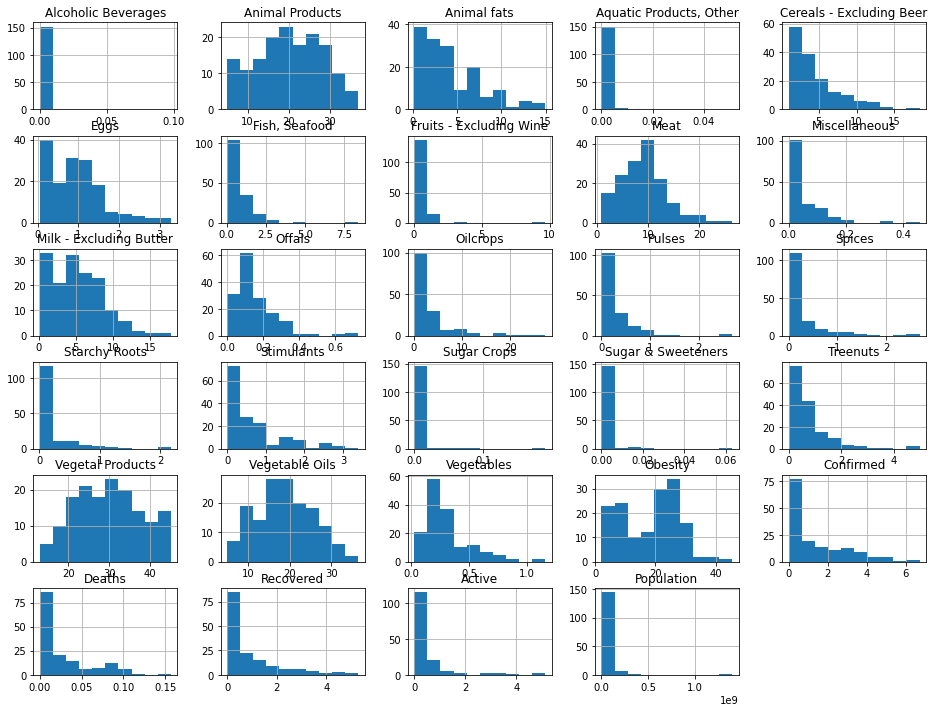

In [17]:
rcParams['figure.figsize'] = 16,12
plots = fat_quantity.hist()

# Clustering

## Data preparation

Scale the dataset

In [18]:


# Select numeric columns for scaling (excluding non-numeric columns)
numeric_columns = fat_quantity.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
fat_quantity[numeric_columns] = scaler.fit_transform(fat_quantity[numeric_columns])

# Display the first few rows of the scaled DataFrame
print(fat_quantity.head())


       Country  Alcoholic Beverages  Animal Products  Animal fats  \
0  Afghanistan            -0.114015         0.158510     0.616925   
1      Albania            -0.114015         1.453311    -0.220621   
2      Algeria            -0.114015        -0.744082    -0.973016   
3       Angola            -0.114015        -0.633280    -0.848871   
5    Argentina            -0.114015         1.247977    -0.253345   

   Aquatic Products, Other  Cereals - Excluding Beer      Eggs  Fish, Seafood  \
0                -0.117474                  1.100886 -0.396178      -0.854818   
1                -0.117474                 -0.555040  1.058390      -0.734257   
2                -0.117474                 -0.082496  0.409606      -0.673545   
3                -0.117474                  0.643568 -1.203176       0.636349   
5                -0.117474                 -0.969430  0.945835      -0.710640   

   Fruits - Excluding Wine      Meat  ...  Vegetable Oils  Vegetables  \
0                -0.13147

## Plot some data

Now, we want to visualize some variables for each state. To do so, we use plotly express to have the possibility to hover on a scatter plot and see the statistics per country clearer as explained here.

https://plotly.com/python/hover-text-and-formatting/#:~:text=Basic%20Charts%20tutorials.-,Hover%20Labels,having%20a%20hover%20label%20appear.

Plot the "Obesity" vs "Deaths" statistics

Plot the "Animal fats" vs "Deaths" statistics

## K-means and Elbow method

We start with the K-Means model:
- use the scikit-learn method
- use the method you implemented.

Use a graphical tool, the elbow method, to estimate the optimal number of clusters k for a given task.
- Determine the optimal number of clusters for the previous 2 plots.

In [1]:
from sklearn.cluster import KMeans


Plot the obtained clusters

## Other clustering methods

We are going to explore other clustering methods, such as Mean-Shift.

You can read more about it in the next ressource:
https://scikit-learn.org/stable/modules/clustering.html


Apply the method to our datasets made of 2 variables ("Obesity" vs "Deaths")

In [2]:
# Mean-Shift
from sklearn.cluster import MeanShift, estimate_bandwidth


Plot the obtained clusters

Check out other algorithms such as DBSAN or OPTICS, why are these algorithms very interesting and in what cases? 

In [36]:
from sklearn.cluster import DBSCAN


# Regression and prediction

Given this dataset and the emphasis we have already laid on deaths through clustering, it would be interesting to study this dataset for a classification purpose and see how accurately we can predict the mortality rate in fonction of the given features.

## Creating train and test sets 

Let's separate the data into a training and testing sets using random selection.

Now drop the labels from the training set and create a new variable for the labels.

Scale the datasets.

## Random Forest

Let's try a random forest model on the prepared fat_quantity training set.

RandomForestRegressor(random_state=42)

Now we predict.

Let's perform a 10 fold cross validation.
And display the resulting scores:

## Learning Curves analysis 

Use the function seen in **Module 1 to plot learning curves with cross validation.** 

In [31]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    pass

Try to interpret the obtained learning curve.

Perform a grid search to try to obtain the best hyperparameters. What is the best score that you obtained?

## SVM

Use the SVM regressor to estimate the death rate. See if you can get a better model than with the Random forest regressor.

## Linear regression

# Dimensionality reduction

Let's take a look at the whole dataset and see if there are any clusters.

In order to do these perform and plot a PCA of 2 components.

Dimensionality reduction is a way to reduce the number of features in your dataset without having to lose much information and keep the model’s performance. Check out the Random Forest based method and PCA for dimensionality reduction in the following ressource:

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

## Random Forest feature selection

Plot the feature importance graph.

Comment the graph.

## PCA dimensionality reduction

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. Apply clustering methods on this new set of variables. Are the clusters obtained different than the clusters obtained on the "Obesity" vs "Deaths"?

Apply the Elbow method to determne the right number of clusters.

Use diverse methods to cluster the countries.